In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

sns.set(color_codes=True)
sns.set(font_scale=True)
sns.set_color_codes()

In [40]:
df = pd.read_csv("../../milky_white_mushroom/results/cazymes/button/filtered_hits.tsv",delimiter="\t")

In [41]:
df

,Gene ID,HMMER,Hotpep,DIAMOND,#ofTools
0,XP_006453938.1,GH47(97-579),GH47(1),GH47,3
1,XP_006453957.1,GT2_Chitin_synth_2(668-1187),GT2(161),GT2,3
2,XP_006453985.1,GH128(103-315),GH128(2),-,2
3,XP_006453992.1,GT21(58-323),GT21(13),GT21,3
4,XP_006454003.1,GH5_5(82-365),GH5(81)+CBM1(8),CBM1+GH5_5,3
...,...,...,...,...,...
293,XP_006456345.1,-,GH27(19),GH27,2
294,XP_006454322.1,-,GT31(22),GT31,2
295,XP_006458634.1,-,GT4(145),GT4,2
296,XP_006460642.1,-,CBM35(43),CBM1+GH27,2


In [42]:
from typing import Dict

from collections import Counter

def clean_label(element):
    indexes_removed = re.sub(r"\([0-9]+-[0-9]+\)","",element)
    return re.sub(r"_[0-9]+","",indexes_removed)

def get_counts(df):
    total = []
    for row in df.values:
        prediction1 = clean_label(row[1]).split('+')
        prediection2 = clean_label(row[3]).split('+')
        list(set(prediction1+prediection2))
        total += [s if "_" not in s else s.split("_")[0] for s in set(prediction1+prediection2) if s != "N" and s != "-" and "." not in s]
    return Counter(total)

def count_cazymes(all_counts: Dict[str,int]):
    cazyme_count = {}
    for sub_group,count in all_counts.items():
        group = sub_group[:2]
        if group[:2] == "CB":
            group = sub_group[:3]
        cazyme_count[group] = cazyme_count.get(group,0) + count
    return cazyme_count

def count_families(all_counts: Dict[str,int]):
    family_counts = {}
    for sub_group,count in all_counts.items():
        group = sub_group[:2]
        if group[:2] == "CB":
            group = sub_group[:3]
        sub_groups =family_counts.get(group,{})
        sub_groups[sub_group] = sub_groups.get(sub_group,0) + count 
        family_counts[group] = sub_groups
    return family_counts
    

In [43]:
all_counts = get_counts(df)
cazyme_count = count_cazymes(all_counts)
family_count = count_families(all_counts)

In [44]:
cazyme_count

{'GH': 149, 'GT': 66, 'CBM': 27, 'CE': 18, 'PL': 10, 'AA': 71}

In [45]:
family_count

{'GH': {'GH47': 6,
  'GH128': 1,
  'GH5': 18,
  'GH16': 14,
  'GH74': 1,
  'GH72': 1,
  'GH18': 10,
  'GH10': 2,
  'GH1': 1,
  'GH31': 6,
  'GH152': 3,
  'GH3': 7,
  'GH78': 4,
  'GH79': 4,
  'GH115': 2,
  'GH28': 3,
  'GH30': 3,
  'GH38': 1,
  'GH20': 4,
  'GH12': 2,
  'GH125': 1,
  'GH95': 1,
  'GH13': 7,
  'GH43': 4,
  'GH2': 2,
  'GH0': 1,
  'GH63': 2,
  'GH11': 2,
  'GH92': 5,
  'GH15': 2,
  'GH44': 1,
  'GH6': 1,
  'GH55': 1,
  'GH88': 1,
  'GH17': 2,
  'GH37': 2,
  'GH105': 1,
  'GH9': 1,
  'GH162': 1,
  'GH71': 2,
  'GH133': 1,
  'GH145': 1,
  'GH27': 4,
  'GH35': 1,
  'GH25': 4,
  'GH53': 1,
  'GH154': 1,
  'GH7': 1,
  'GH51': 1,
  'GH29': 1},
 'GT': {'GT2': 24,
  'GT21': 1,
  'GT8': 1,
  'GT22': 3,
  'GT33': 1,
  'GT1': 2,
  'GT59': 1,
  'GT90': 3,
  'GT69': 1,
  'GT48': 2,
  'GT20': 3,
  'GT0': 2,
  'GT15': 3,
  'GT3': 1,
  'GT50': 1,
  'GT5': 1,
  'GT4': 4,
  'GT58': 1,
  'GT57': 2,
  'GT32': 1,
  'GT39': 3,
  'GT49': 1,
  'GT66': 1,
  'GT24': 1,
  'GT35': 1,
  'GT31': 1},


In [46]:
sum(value for value in cazyme_count.values())

341

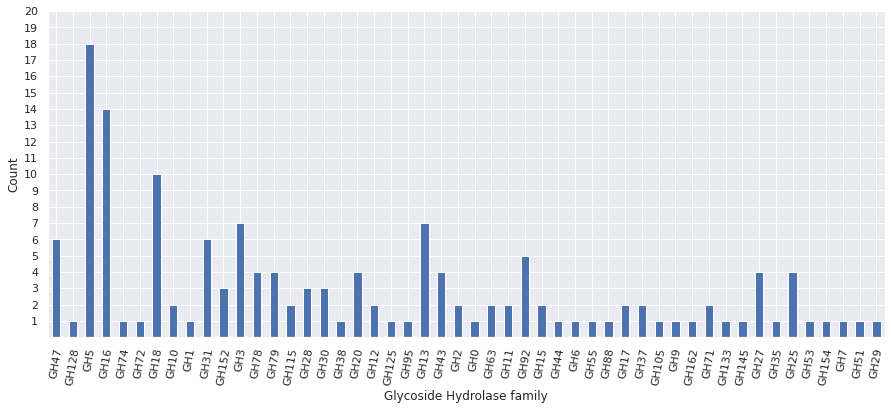

In [47]:
figure,axes = plt.subplots(nrows=1,ncols=1,figsize=(15,6))
    
s = pd.Series(family_count["GH"])
s.plot(ax=axes,kind="bar")
plt.ylabel("Count")
plt.xlabel("Glycoside Hydrolase family")
plt.yticks(range(1,21))
plt.xticks(rotation=80)
plt.savefig('GH-Counts.png',bbox_inches="tight")
plt.show()